In [19]:
#Look across all previously generated figures 
#and tables and write at least three observations or inferences that can be made from the data. 
#Include these observations at the top of notebook.
#------------Answer-------------
#Observations:
#Obs1.From scatter plot, it looks like the heavier the mouse, the bigger the tumor in  Capomulin treatment. 
#Mouse weight and Tumor size are positively correlated. 
#Obs2.this study included equally number of male and female. 
#Obs3.Looks like Infubinol is the least promising treatment among 
#the 4 treatments: Capomulin, Ramicane, Infubinol, and Ceftamin


In [21]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
mouse_study = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")
mouse_study

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [22]:
#Generate a summary statistics table of mean, 
#median, variance, standard deviation, 
#and SEM of the tumor volume for each regimen
drug_regimen = mouse_study.groupby('Drug Regimen')
stat_sum = drug_regimen.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
stat_sum

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


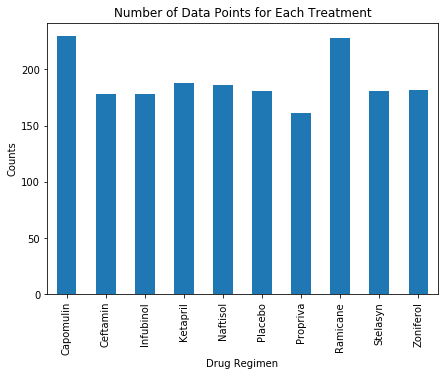

In [24]:
#Generate a bar plot showing number of data points for each treatment regimen using pandas
each_treatment = mouse_study.groupby('Drug Regimen').count()['Mouse ID']
bar_plot_df = pd.DataFrame(each_treatment)
# Use DataFrame.plot() in order to create a bar chart of the data
bar_plot_df.plot(kind="bar", figsize=(7,5))
# Set a title for the chart
plt.title("Number of Data Points for Each Treatment")
plt.ylabel('Counts')
plt.legend().remove()
plt.savefig('bar_plot_pandas')
plt.show()


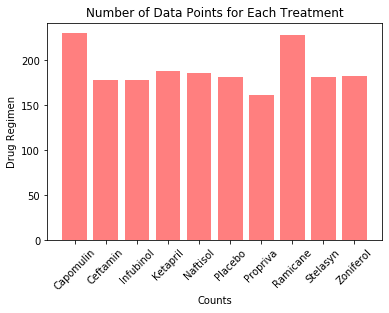

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
x_axis = np.arange(len(each_treatment))
plt.bar(x_axis, each_treatment, color='r', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol","Placebo","Propriva","Ramicane","Stelasyn","Zoniferol"],rotation="45")
plt.title("Number of Data Points for Each Treatment")
plt.xlabel("Counts")
plt.ylabel("Drug Regimen")
plt.savefig('bar_plot_pyplot')



In [5]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_distribution = mouse_study.groupby(["Mouse ID","Sex"])
sex_distribution_df = pd.DataFrame(sex_distribution.size())
pie_plot_df = pd.DataFrame(sex_distribution_df.groupby(["Sex"]).count())
pie_plot_df.columns = ["Total Count"]
pie_plot_df


,Total Count
Sex,
Female,124
Male,125


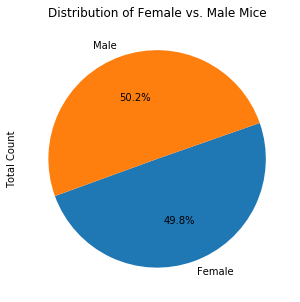

In [33]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
pie_plot_pandas = pie_plot_df["Total Count"].plot.pie(figsize=(5, 5), autopct="%1.1f%%",startangle=200)
plt.title('Distribution of Female vs. Male Mice')
plt.savefig('pie_plot_pandas')
plt.show()

/Users/trannguyen/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """


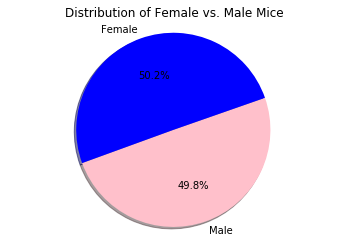

In [27]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
colors = ["pink", "blue"]
label = ["Male","Female"]
plt.pie(pie_plot_df, labels=label, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=200)
plt.title('Distribution of Female vs. Male Mice')
plt.axis("equal")
plt.savefig('pie_plot_pyplot')
plt.show()

In [8]:
#Calculate the final tumor volume of each mouse across four of the most promising treatment regimens: 
#Capomulin, Ramicane, Infubinol, and Ceftamin. 
#creating each treatment data frame
Capomulin_df = mouse_study.loc[mouse_study["Drug Regimen"] == "Capomulin",:]
Ramicane_df = mouse_study.loc[mouse_study["Drug Regimen"] == "Ramicane", :]
Infubinol_df = mouse_study.loc[mouse_study["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = mouse_study.loc[mouse_study["Drug Regimen"] == "Ceftamin", :]
Capomulin_df
#Calculate the quartiles and IQR 
#and quantitatively determine if there are any potential outliers across all four treatment regimens.

#Using Matplotlib, generate a box and whisker plot of the final tumor volume for all four treatment regimens
#and highlight any potential outliers in the plot by changing their color and style.

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [9]:
#Calculate the final tumor volume of each mouse across four of the most promising treatment regimens: 
Capomulin_treatment = Capomulin_df.groupby('Mouse ID')['Timepoint'].last()
Capomulin_treatment_df = pd.DataFrame(Capomulin_treatment)
Capomulin_filter_treatment_df = pd.merge(Capomulin_treatment_df, mouse_study, on=("Mouse ID","Timepoint"),how="left")
Capomulin_filter_treatment_tumor = Capomulin_filter_treatment_df["Tumor Volume (mm3)"]
Capomulin_filter_treatment_df.head()


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [10]:
#Calculate the quartiles and IQR 
#and quantitatively determine if there are any potential outliers across Capomulin treatment regimens.
quartiles = Capomulin_filter_treatment_tumor.quantile([0.25,0.5,0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of final tumor volume across Capomulin treatment is: {lowerq}")
print(f"The upper quartile of final tumor volume across Capomulin treatment is: {upperq}")
print(f"The interquartile range of final tumor volume across Capomulin treatment is: {iqr}")
print(f"The the median of final tumor volume across Capomulin treatment is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of final tumor volume across Capomulin treatment is: 32.37735684
The upper quartile of final tumor volume across Capomulin treatment is: 40.1592203
The interquartile range of final tumor volume across Capomulin treatment is: 7.781863460000004
The the median of final tumor volume across Capomulin treatment is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [11]:
#Calculate the final tumor volume of each mouse across four of the most promising treatment regimens: 
Ramicane_treatment = Ramicane_df.groupby('Mouse ID')['Timepoint'].last()
Ramicane_treatment_df = pd.DataFrame(Ramicane_treatment)
Ramicane_filter_treatment_df = pd.merge(Ramicane_treatment_df, mouse_study, on=("Mouse ID","Timepoint"),how="left")
Ramicane_filter_treatment_tumor = Ramicane_filter_treatment_df["Tumor Volume (mm3)"]
Ramicane_filter_treatment_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2


In [12]:
#Calculate the quartiles and IQR 
#and quantitatively determine if there are any potential outliers across Ramicane treatment regimens.
quartiles = Ramicane_filter_treatment_tumor.quantile([0.25,0.5,0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of final tumor volume across Ramicane treatment is: {lowerq}")
print(f"The upper quartile of final tumor volume across Ramicane treatment is: {upperq}")
print(f"The interquartile range of final tumor volume across Ramicane treatment is: {iqr}")
print(f"The the median of final tumor volume across Ramicane treatment is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of final tumor volume across Ramicane treatment is: 31.56046955
The upper quartile of final tumor volume across Ramicane treatment is: 40.65900627
The interquartile range of final tumor volume across Ramicane treatment is: 9.098536719999998
The the median of final tumor volume across Ramicane treatment is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [13]:
#Calculate the final tumor volume of each mouse across four of the most promising treatment regimens: 
Infubinol_treatment = Infubinol_df.groupby('Mouse ID')['Timepoint'].last()
Infubinol_treatment_df = pd.DataFrame(Infubinol_treatment)
Infubinol_filter_treatment_df = pd.merge(Infubinol_treatment_df, mouse_study, on=("Mouse ID","Timepoint"),how="left")
Infubinol_filter_treatment_tumor = Infubinol_filter_treatment_df["Tumor Volume (mm3)"]
Infubinol_filter_treatment_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2


In [14]:
#Calculate the quartiles and IQR 
#and quantitatively determine if there are any potential outliers across Ramicane treatment regimens.
quartiles = Infubinol_filter_treatment_tumor.quantile([0.25,0.5,0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of final tumor volume across Infubinol treatment is: {lowerq}")
print(f"The upper quartile of final tumor volume across Infubinol treatment is: {upperq}")
print(f"The interquartile range of final tumor volume across Infubinol treatment is: {iqr}")
print(f"The the median of final tumor volume across Infubinol treatment is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of final tumor volume across Infubinol treatment is: 54.04860769
The upper quartile of final tumor volume across Infubinol treatment is: 65.52574285
The interquartile range of final tumor volume across Infubinol treatment is: 11.477135160000003
The the median of final tumor volume across Infubinol treatment is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [15]:
#Calculate the final tumor volume of each mouse across four of the most promising treatment regimens: 
Ceftamin_treatment = Ceftamin_df.groupby('Mouse ID')['Timepoint'].last()
Ceftamin_treatment_df = pd.DataFrame(Ceftamin_treatment)
Ceftamin_filter_treatment_df = pd.merge(Ceftamin_treatment_df, mouse_study, on=("Mouse ID","Timepoint"),how="left")
Ceftamin_filter_treatment_tumor = Ceftamin_filter_treatment_df["Tumor Volume (mm3)"]
Ceftamin_filter_treatment_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [16]:
#Calculate the quartiles and IQR 
#and quantitatively determine if there are any potential outliers across Ramicane treatment regimens.
quartiles = Ceftamin_filter_treatment_tumor.quantile([0.25,0.5,0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of final tumor volume across Ceftamin treatment is: {lowerq}")
print(f"The upper quartile of final tumor volume across Ceftamin treatment is: {upperq}")
print(f"The interquartile range of final tumor volume across Ceftamin treatment is: {iqr}")
print(f"The the median of final tumor volume across Ceftamin treatment is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of final tumor volume across Ceftamin treatment is: 48.72207785
The upper quartile of final tumor volume across Ceftamin treatment is: 64.29983003
The interquartile range of final tumor volume across Ceftamin treatment is: 15.577752179999997
The the median of final tumor volume across Ceftamin treatment is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


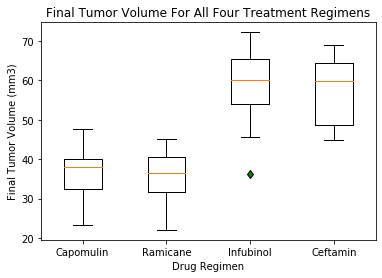

In [17]:
#generate a box and whisker plot of the final tumor volume for all four treatment regimens 
#and highlight any potential outliers in the plot by changing their color and style.
box_plot= [Capomulin_filter_treatment_tumor, Ramicane_filter_treatment_tumor, 
           Infubinol_filter_treatment_tumor, Ceftamin_filter_treatment_tumor]
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume For All Four Treatment Regimens')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
red = dict(markerfacecolor='g', marker='d')
ax1.boxplot(box_plot, labels=["Capomulin","Ramicane","Infubinol","Ceftamin"],flierprops=red)
plt.savefig('box_plot')
plt.show()

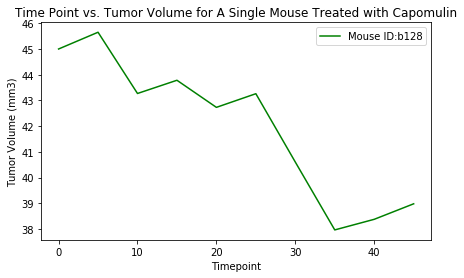

In [18]:
#Generate a line plot of time point versus tumor volume for a single mouse treated with Capomulin.
#generate data frame of time point versus tumor volume for a single mouse treated with Capomulin
line_plot = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "b128",:]
line_plot_df = line_plot[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
line_plot_df.plot.line(x='Timepoint', y='Tumor Volume (mm3)',figsize=(7,4),color="green", label="Mouse ID:b128" )
plt.ylabel('Tumor Volume (mm3)')
plt.title('Time Point vs. Tumor Volume for A Single Mouse Treated with Capomulin')
plt.savefig('line_plot')


<IPython.core.display.Javascript object>


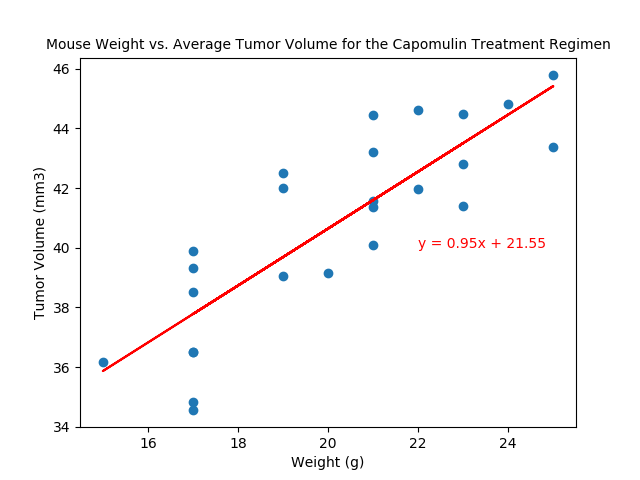

The r-squared is: 0.8419363424694718
y = 0.95x + 21.55


In [28]:
#Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin treatment regimen.
#generate data frame of mouse weight versus average tumor volume for the Capomulin treatment regimen.

scatter_plot = Capomulin_df.groupby(['Mouse ID']).mean()
x_values = scatter_plot['Weight (g)']
y_values = scatter_plot['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values).figsize=(15,20)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(22,40),fontsize=10,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
print(f"The r-squared is: {rvalue}")
print(line_eq)
plt.title('Mouse Weight vs. Average Tumor Volume for the Capomulin Treatment Regimen',fontsize=10)
plt.savefig('scatter_plot')
plt.show()
